In [1]:
import pandas as pd

# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
#Let's convert all the categorical variables into dummy variables
X = pd.get_dummies(df)

# show  the first 5 rows 
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


In [5]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   interest             1143 non-null   int64  
 4   Impressions          1143 non-null   int64  
 5   Clicks               1143 non-null   int64  
 6   Spent                1143 non-null   float64
 7   Total_Conversion     1143 non-null   int64  
 8   Approved_Conversion  1143 non-null   int64  
 9   age_30-34            1143 non-null   uint8  
 10  age_35-39            1143 non-null   uint8  
 11  age_40-44            1143 non-null   uint8  
 12  age_45-49            1143 non-null   uint8  
 13  gender_F             1143 non-null   uint8  
 14  gender_M             1143 non-null   uint8  
dtypes: float64(1), int64(8), uint8(6)
memo

In [7]:
#Use a heat map to show the correlation in the data.
X.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331,-0.115297,0.045434,0.063397,0.029789,-0.058324,0.058324
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968,-0.117677,0.048032,0.065182,0.028329,-0.086118,0.086118
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658,-0.124770,0.041082,0.075093,0.034196,-0.038037,0.038037
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353,-0.055644,0.021583,0.029271,0.015942,0.047230,-0.047230
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249,-0.066877,-0.028549,0.002822,0.102743,0.067059,-0.067059
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526,-0.150856,-0.044296,0.028765,0.191246,0.168725,-0.168725
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178,-0.138037,-0.039705,0.020909,0.179187,0.125022,-0.125022
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034,0.086600,-0.038931,-0.038657,-0.025933,0.027559,-0.027559
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000,0.095685,-0.033133,-0.036732,-0.043914,-0.025350,0.025350
age_30-34,-0.115297,-0.117677,-0.124770,-0.055644,-0.066877,-0.150856,-0.138037,0.086600,0.095685,1.000000,-0.405751,-0.365691,-0.417224,-0.030271,0.030271


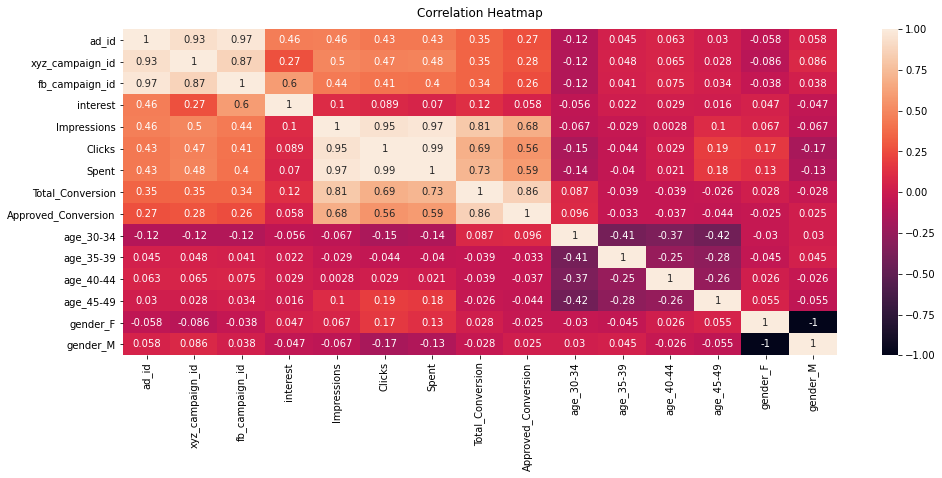

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#Dropping the first 4 columns in the data frame X

In [9]:
#removing columns that don't lead to employee attrition 
X=X.drop('ad_id',axis=1)
X=X.drop('xyz_campaign_id',axis=1)
X=X.drop('fb_campaign_id',axis=1)
X=X.drop('interest',axis=1)

In [10]:
X.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.43,2,1,1,0,0,0,0,1
1,17861,2,1.82,2,0,1,0,0,0,0,1
2,693,0,0.00,1,0,1,0,0,0,0,1
3,4259,1,1.25,1,0,1,0,0,0,0,1
4,4133,1,1.29,1,1,1,0,0,0,0,1


**reasons for droping the above columns**


Because the corellation Values between these variables and conversion which is our target variable are closer to zero means there is no linear relation between the variables and our target variable. Clearly shown by the colour shade close to zero

**Using the elbow method: Determine the best number of clusters for the data in the range of 2 to 20. Also include the graphical plot for the elbow curve.**

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)

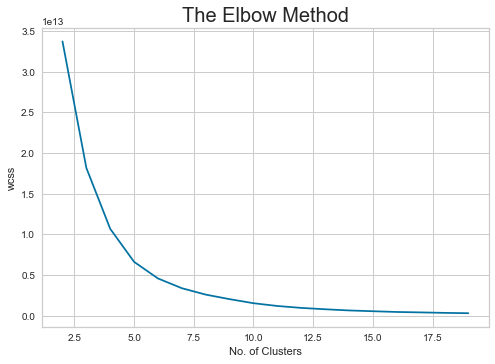

In [19]:
#graphical plot for the elbow curve
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

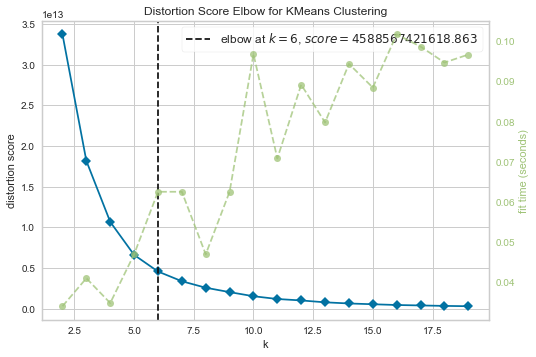

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), X, k=(2,20))

**Based on the result above use the value at your elbow point to cluster the values in the data frame X.**

In [21]:
# k = 6
km = KMeans(n_clusters=6)

In [22]:
km.fit(X)

KMeans(n_clusters=6)

In [23]:
# Fit n Predict
clusters = km.predict(X)

In [24]:

clusters

array([0, 0, 0, ..., 2, 1, 4])

**Use the model to predict the labels from the data and save them to variable y_means.**

In [26]:
# Get all the Labels(Clusters)
y_means= km.labels_

In [27]:
y_means

array([0, 0, 0, ..., 2, 1, 4])

**Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’**

In [29]:
df['Advert_Type'] = y_means.tolist()
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0


**Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following: a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?**

<AxesSubplot:xlabel='Advert_Type', ylabel='Approved_Conversion'>

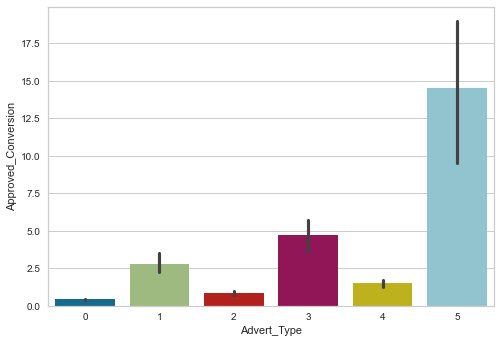

In [30]:
import seaborn as sns


sns.barplot(y='Approved_Conversion',x='Advert_Type',data=df)

The 1st advert type had highest and consistent amount of sales


**Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?**

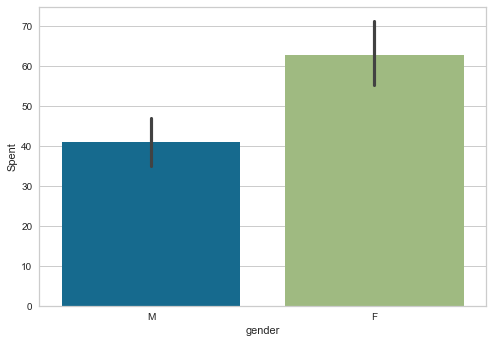

In [32]:
ax = sns.barplot(x="gender", y="Spent", data=df)


The company has a gender bias since they spend more on ads meant for the female gender


**Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.**

In [34]:
df.shape

(1143, 12)

In [35]:
data = df.iloc[:, 5:12].values

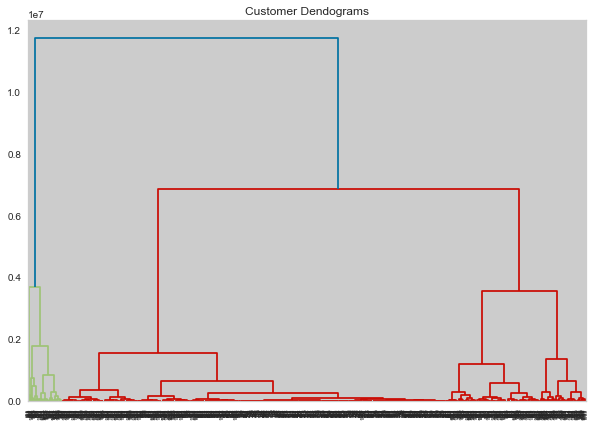

In [36]:
#Hierarchical Clustering via Scikit-Learn

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))